In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import tree

sns.set(style="darkgrid")
pd.set_option("display.precision", 10)

# Mengambil directory dan input file awal

In [22]:
cwd = os.getcwd()
input_dir = os.path.join(cwd, 'input')
output_dir = os.path.join(cwd, 'output')
features = os.path.join(output_dir, 'features_without_high_correlated_value.csv')

In [23]:
df = pd.read_csv(features)

In [24]:
df

,amplitude__ratio_beyond_r_sigma__r_5,amplitude__ratio_beyond_r_sigma__r_1,amplitude__large_standard_deviation__r_0.1,amplitude__energy_ratio_by_chunks__num_segments_10__segment_focus_3,"amplitude__fft_aggregated__aggtype_""kurtosis""",amplitude__ratio_beyond_r_sigma__r_2.5,amplitude__lempel_ziv_complexity__bins_100,amplitude__ratio_beyond_r_sigma__r_0.5,amplitude__large_standard_deviation__r_0.15000000000000002,amplitude__energy_ratio_by_chunks__num_segments_10__segment_focus_7,...,"amplitude__fft_coefficient__attr_""imag""__coeff_38","amplitude__fft_coefficient__attr_""imag""__coeff_5","amplitude__fft_coefficient__attr_""real""__coeff_57","amplitude__fft_coefficient__attr_""real""__coeff_54","amplitude__fft_coefficient__attr_""angle""__coeff_19","amplitude__fft_coefficient__attr_""angle""__coeff_8","amplitude__fft_coefficient__attr_""angle""__coeff_55","amplitude__fft_coefficient__attr_""angle""__coeff_11","amplitude__fft_coefficient__attr_""imag""__coeff_72",amplitude__number_peaks__n_10
0,0.002997003,0.2007992008,0.0,0.4695131897,44.9577530045,0.035964036,0.4455544456,0.4165834166,0.0,0.0340940307,...,2.1054294989,0.2330961166,-6.3741940488,-0.9996622921,-67.4158081433,-175.3161805879,21.9297860273,143.5495521129,4.4376810807,55.0
1,0.006000000,0.1660000000,0.0,0.3265442118,42.6081379104,0.037000000,0.4330000000,0.3710000000,0.0,0.0198726947,...,-0.0962460950,-0.3546121009,0.5999169223,0.1766948571,-0.6938379031,-178.0568106346,139.6812917214,-18.4378310025,1.2274921268,45.0
2,0.001000000,0.2210000000,0.0,0.3454570172,28.5812272014,0.035000000,0.4570000000,0.4700000000,0.0,0.0551714083,...,-1.6731643575,-0.3587289462,3.4959953892,-1.3859121541,0.8769392612,-41.3006990690,-65.7879591737,-26.1360646196,0.7145281686,48.0
3,0.000000000,0.2090000000,1.0,0.3491768673,37.9860056990,0.045000000,0.4690000000,0.4160000000,0.0,0.0322638023,...,0.8964878768,-0.1156830248,-10.9760240291,2.1296661492,-143.9849491361,-81.2980852958,-164.4325194043,155.0192258797,-8.1864197188,52.0
4,0.000999001,0.2327672328,1.0,0.3910902738,42.5033582628,0.034965035,0.4505494505,0.4735264735,0.0,0.0464487444,...,2.6136324119,-0.0237909933,-10.5318729585,-5.1608902790,-132.1589523073,163.5952326447,26.7157059068,166.5713104952,9.3470817876,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0.000000000,0.3286713287,1.0,0.1720365714,8.8185851574,0.014985015,0.5034965035,0.6203796204,1.0,0.0540751972,...,-0.6072514848,4.9983398004,-0.2593621310,0.1305135769,-57.5537393756,-41.1256578689,-44.4919991383,-130.7491947450,0.1549954689,33.0
697,0.000000000,0.3126873127,1.0,0.1366882946,9.3193432181,0.009990010,0.4945054945,0.5914085914,1.0,0.0364986995,...,-0.2255819937,-5.1351464235,-0.1105308624,-0.1704914495,-119.5199160906,132.9156645621,-150.6331231757,-148.2389077426,-0.2134674064,32.0
698,0.000000000,0.2890000000,1.0,0.1889252479,37.6298956498,0.021000000,0.4790000000,0.5120000000,0.0,0.0656250600,...,7.7228269152,-0.0722401194,-9.1329833103,-17.9871242354,162.0903568770,82.2023725844,-76.3385062094,-10.4199116597,-15.3185514860,51.0
699,0.000000000,0.2510000000,1.0,0.1232554300,31.4092530444,0.024000000,0.4920000000,0.5320000000,0.0,0.0936749354,...,-0.3370929589,0.0641408217,1.4407306603,-0.4489547677,-172.2411070832,-82.9992514685,-42.9306885987,-179.7270033438,0.5029317330,45.0


Mengambil data label atau target

In [25]:
y = pd.read_csv(os.path.join(input_dir, 'label.csv'), index_col=0)
y = y['label']
y

1      1
2      1
3      1
4      1
5      1
      ..
697    2
698    2
699    2
700    2
701    2
Name: label, Length: 701, dtype: int64

---

# Membagi data menjadi data untuk *training* dan *test*

1. Variabel `X_train` merupakan data berisikan semua nilai *features* dan akan digunakan untuk *training model*. Pada kasus ini digunakan 70% data.
2. Variabel `X_test` adalah variabel yang digunakan untuk *test model*. Data ini berjumlah 30% data.
3. Variabel `y_train` adalah `label` atau `target` atau `class` yang berisikan nilai dari prediksi untuk *training model*.
4. Variabel `y_test` adalah `label` atau `target` atau `class` yang berisikan nilai dari prediksi untuk *test model*.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 0)

In [27]:
print('Jumlah Data untuk training : {}'.format(X_train.shape))

Jumlah Data untuk training : (490, 365)


In [28]:
print('Jumlah Data untuk test : {}'.format(X_test.shape))

Jumlah Data untuk test : (211, 365)


---

# Training menggunakan Random Forest Classifier

In [47]:
rfc = RandomForestClassifier(
    n_estimators=100, 
    max_depth=5, 
    random_state=17
)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [48]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 1.0000


---

# Menghitung nilai Features Importance

In [49]:
features_importance = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [50]:
features_importance = features_importance.to_frame()

features_importance.reset_index(drop=False, inplace=True)

features_importance = features_importance.rename(columns={
    'index':'features',
    0 : 'score',
})

In [51]:
features_importance

,features,score
0,amplitude__ratio_beyond_r_sigma__r_2.5,0.0545222318
1,amplitude__ratio_beyond_r_sigma__r_0.5,0.0474402816
2,amplitude__ratio_beyond_r_sigma__r_1,0.0385101767
3,amplitude__lempel_ziv_complexity__bins_100,0.0382036442
4,amplitude__lempel_ziv_complexity__bins_5,0.0369501543
...,...,...
360,"amplitude__fft_coefficient__attr_""abs""__coeff_49",0.0000000000
361,"amplitude__fft_coefficient__attr_""angle""__coef...",0.0000000000
362,"amplitude__fft_coefficient__attr_""real""__coeff_22",0.0000000000
363,"amplitude__fft_coefficient__attr_""real""__coeff_24",0.0000000000


In [63]:
quantile_75 = features_importance.describe().loc['75%','score']

Mengambil *features* yang memiliki *score* lebih dari nilai quantile 0.75

In [64]:
features_importance = features_importance[features_importance['score'] > quantile_75]

In [66]:
features_importance

,features,score
0,amplitude__ratio_beyond_r_sigma__r_2.5,0.0545222318
1,amplitude__ratio_beyond_r_sigma__r_0.5,0.0474402816
2,amplitude__ratio_beyond_r_sigma__r_1,0.0385101767
3,amplitude__lempel_ziv_complexity__bins_100,0.0382036442
4,amplitude__lempel_ziv_complexity__bins_5,0.0369501543
...,...,...
69,"amplitude__fft_coefficient__attr_""abs""__coeff_29",0.0027717367
70,"amplitude__fft_coefficient__attr_""abs""__coeff_6",0.0027619720
71,"amplitude__fft_coefficient__attr_""imag""__coeff_61",0.0027420580
72,"amplitude__fft_coefficient__attr_""abs""__coeff_19",0.0027294795


Menyimpan *features importance*

In [67]:
features_importance.to_csv(os.path.join(output_dir, 'features_importance.csv'), index=False)

---

# Plot nilai Features Importance 

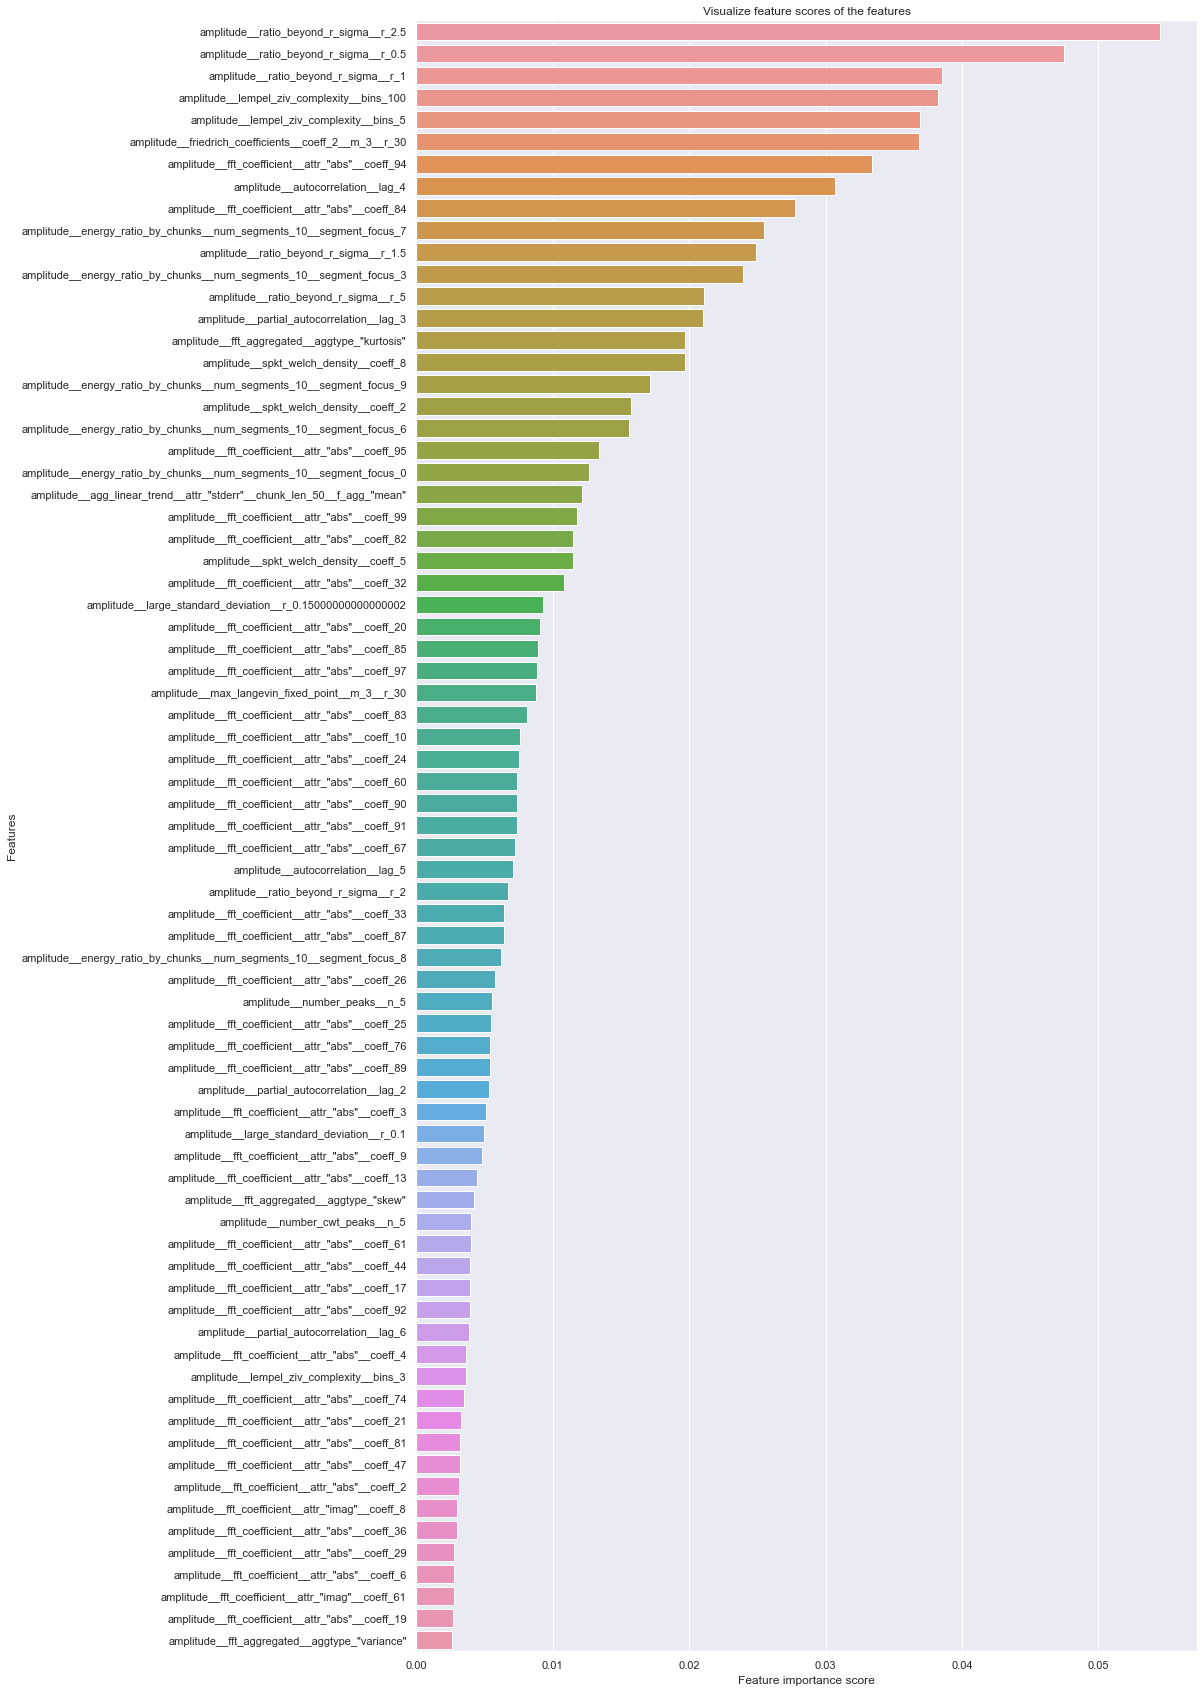

In [68]:
f, ax = plt.subplots(figsize=(14, 30))

ax = sns.barplot(
    x = 'score',
    y = 'features',
    data = features_importance
)

filename = os.path.join(output_dir, 'features_importance.tiff')

ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(features_importance['features'])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

---

# Confusion Matrix

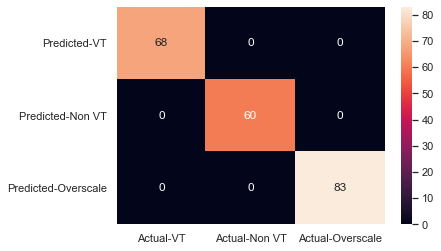

In [69]:
filename = os.path.join(output_dir, 'confusion_matriks.tiff')

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual-VT', 'Actual-Non VT', 'Actual-Overscale'], 
                                 index=['Predicted-VT', 'Predicted-Non VT', 'Predicted-Overscale'])

sns.heatmap(cm_matrix, annot=True, fmt='d')
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

---

# Menyimpan Decison Tree 

In [70]:
def save_tree(index, pohon):
    filename = os.path.join(save_dir,'tree_{}.png'.format(index))
    fig = plt.figure(figsize=(20,12))
    tree.plot_tree(
        pohon,
        filled=True,
        class_names=["vt", "non-vt","overscale"],
        fontsize=12,
        node_ids=True,
    )

    fig.savefig(filename, bbox_inches='tight')
    plt.close()

In [71]:
save_dir = os.path.join(output_dir, 'trees')
tree_list = rfc.estimators_

for index, pohon in enumerate(tree_list):
    save_tree(index, pohon)